# Bode and Nyquist Plots
#### For first and second order systems

In [1]:
import matplotlib
from matplotlib import style
import control as co

%config InlineBackend.figure_format = 'retina'

# style.use("dark_background")
matplotlib.rcParams.update({'font.size': 14})

In [2]:
tau = 1.33

firstorder = co.tf([1], [tau, 1])
firstorder

TransferFunction(array([1]), array([1.33, 1.  ]))

In [3]:
epsilon = 1
secondorder = co.tf([1], [tau ** 2, 2 * tau * epsilon, 1])
secondorder

TransferFunction(array([1]), array([1.7689, 2.66  , 1.    ]))

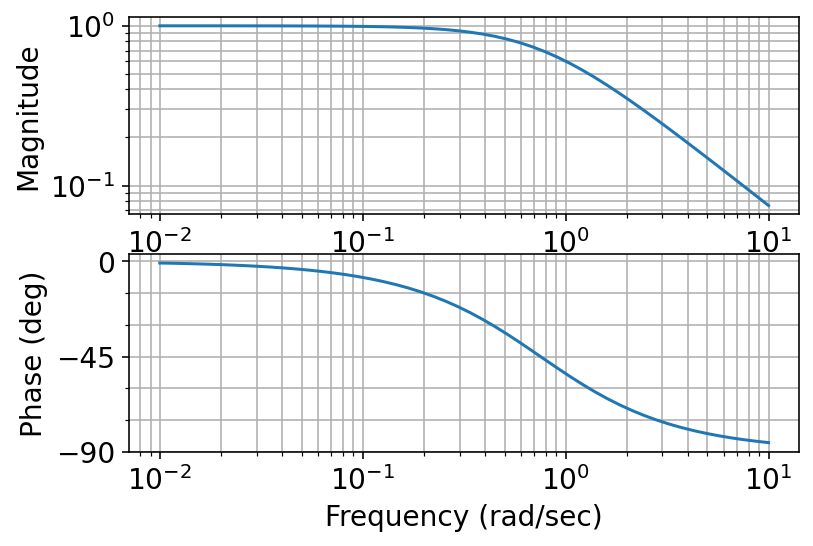

In [4]:
co.bode(firstorder);

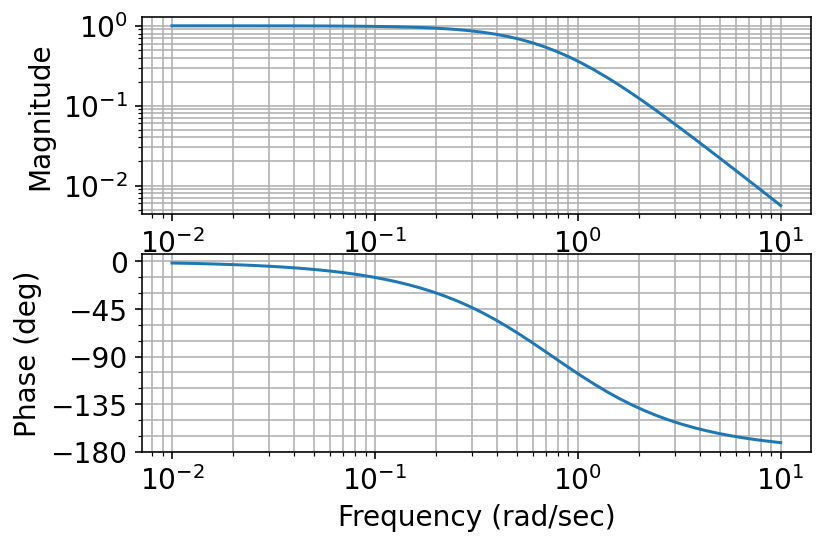

In [5]:
co.bode(secondorder);

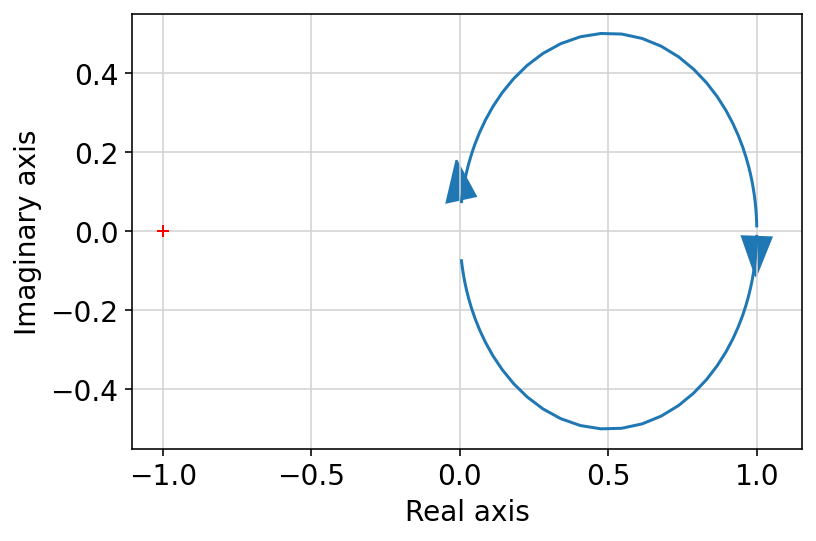

In [6]:
co.nyquist(firstorder);

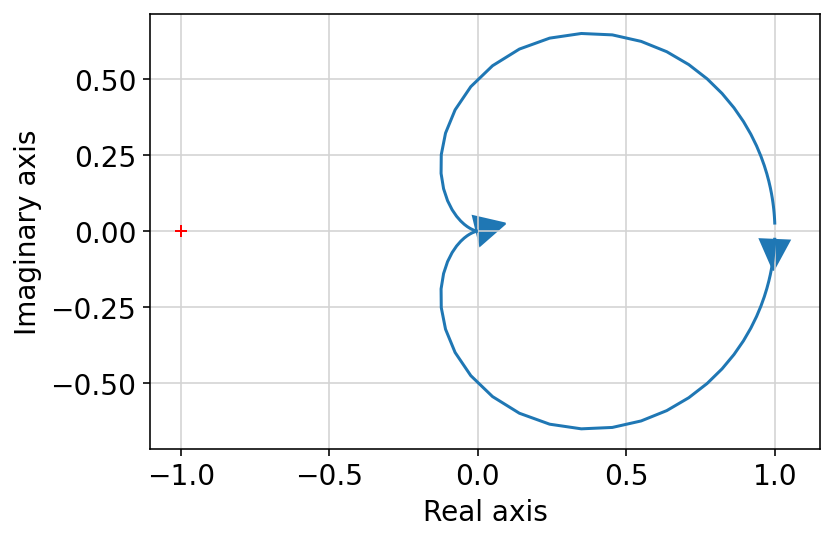

In [7]:
co.nyquist(secondorder);

### Polar Plots

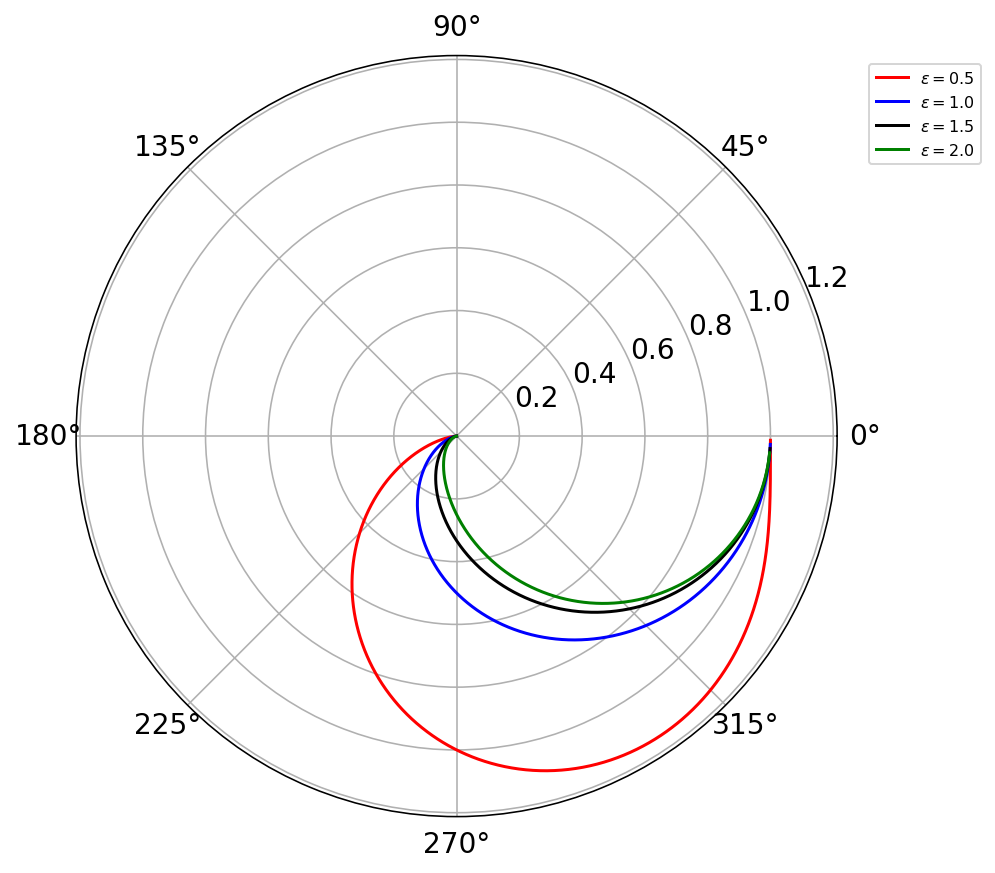

In [8]:
import matplotlib.pyplot as plt
import numpy as np

omega = np.linspace(0.01, 100, 100000)
tau = 1.33
# epsilon = 2

def secondorder(epsilon):
    phi2 = -np.pi / 2 - np.arctan(-(1 - (omega * tau) ** 2) / (2 * omega * tau * epsilon))
    r2 = 1 / np.sqrt((1 - (omega * tau) ** 2) ** 2 + (2 * omega * tau * epsilon) ** 2)
    return phi2, r2

phi22, r22 = secondorder(0.5)
phi23, r23 = secondorder(1.0)
phi24, r24 = secondorder(1.5)
phi25, r25 = secondorder(2.0)

plt.figure(figsize=(9, 7))
plt.polar(phi22, r22, 'r', label=r'$\epsilon=0.5$')
plt.polar(phi23, r23, 'b', label=r'$\epsilon=1.0$')
plt.polar(phi24, r24, 'k', label=r'$\epsilon=1.5$')
plt.polar(phi25, r25, 'g', label=r'$\epsilon=2.0$')
plt.legend(loc='best', bbox_to_anchor=[1.2, 1], fontsize=8)
plt.savefig("2ndorder.png", dpi=300)

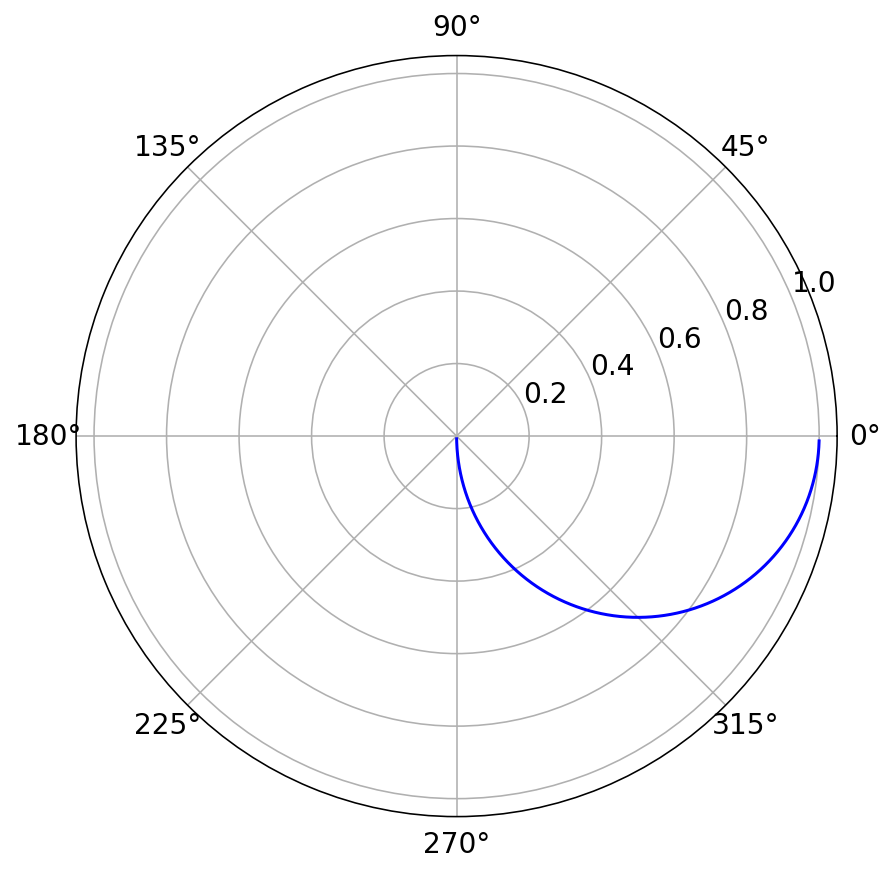

In [9]:
phi1 = np.arctan(-omega * tau)
r1 = 1 / np.sqrt(1 + (omega * tau) ** 2)
plt.figure(figsize=(7, 7))
plt.polar(phi1, r1, 'b')
plt.savefig("1storder.png", dpi=300);